# **1. Import Libraries and Dataset**



In [1]:
#import basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# import preprocessing libraries
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word
# import polarization libraries
nltk.downloader.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
# import model libraries
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pickle

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/tarunvinodhkumar/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
#İmport dataset
df = pd.read_csv("Dataset.csv")
df.head()

,profile,user_id,user_name,tweet_text,retweet_text,like_text
0,https://twitter.com/2curlykitties,1.013187e+09,@2curlykitties,It's just over 2 years since I was diagnosed w...,Just finished a service centre call that didn'...,Just finished a service centre call that didn'...
1,https://twitter.com/2curlykitties,1.013187e+09,@2curlykitties,"It's Sunday, I need a break, so I'm planning t...",RT @CambridgeNewsUK: Man taken to hospital aft...,Just finished a service centre call that didn'...
2,https://twitter.com/2curlykitties,1.013187e+09,@2curlykitties,Awake but tired. I need to sleep but my brain ...,@EONhelp you too! ☀️,@the_candourist glad to see that you survived ...
3,https://twitter.com/2curlykitties,1.013187e+09,@2curlykitties,RT @SewHQ: #Retro bears make perfect gifts and...,"@EONhelp hi, thx. Yes, I found it in the end a...",I’ve just remembered that the new house has r...
4,https://twitter.com/2curlykitties,1.013187e+09,@2curlykitties,It’s hard to say whether packing lists are mak...,"@EONhelp re my last tweet, don't worry, spoke ...",Square 10 / lacy #crochet / pale blue DK yarn ...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7354 entries, 0 to 7353
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   profile       7354 non-null   object 
 1   user_id       7351 non-null   float64
 2   user_name     7349 non-null   object 
 3   tweet_text    7350 non-null   object 
 4   retweet_text  7336 non-null   object 
 5   like_text     7336 non-null   object 
dtypes: float64(1), object(5)
memory usage: 344.8+ KB


In [ ]:
df.shape

(7354, 6)

# **2. Data Cleaning and Preprocessing**

In [ ]:
# removing all rows where even 1 rows is null
df.dropna(inplace = True)
df.shape

(7318, 6)

In [ ]:
# Create a new DataFrame and add rows of all three columns to the first column
df = pd.DataFrame({'text': df['tweet_text'].tolist() + df['retweet_text'].tolist() + df['like_text'].tolist()})
df.head()


,text
0,It's just over 2 years since I was diagnosed w...
1,"It's Sunday, I need a break, so I'm planning t..."
2,Awake but tired. I need to sleep but my brain ...
3,RT @SewHQ: #Retro bears make perfect gifts and...
4,It’s hard to say whether packing lists are mak...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21954 entries, 0 to 21953
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    21954 non-null  object
dtypes: object(1)
memory usage: 171.6+ KB


In [ ]:
# Pre-processing

nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")
nltk.download("omw-1.4")

def preprocess_text(df, column_name):
    """
    Preprocesses text data in a given column of a pandas DataFrame.
    """
    # Convert to lowercase
    df[column_name] = df[column_name].apply(lambda x: " ".join(x.lower() for x in x.split()))
    # Removing numerical values
    df[column_name] = df[column_name].str.replace("\d","")
    # Removing punctations
    df[column_name] = df[column_name].str.replace("[^\w\s]","")
    df[column_name] = df[column_name].str.replace(r"(\x23.* )+", "")
    df[column_name] = df[column_name].str.replace('_', '')
    df[column_name] = df[column_name].str.replace('__', '')
    # Removing double space
    df[column_name] = df[column_name].str.replace("\s+", " ")
    # Removing user
    df[column_name] = df[column_name].str.replace('(@[A-Za-z]+[A-Za-z0-9-_]+)', '') #remove twitted at
    # Removing links
    df[column_name] = df[column_name].str.replace('http\S+', '')
    # Removing small words which are less than given condition
    df[column_name] = df[column_name].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
    # STOPWORDS
    sw = stopwords.words("english")
    df[column_name] = df[column_name].apply(lambda x: " ".join(x for x in x.split() if x not in sw))
    # Lemmatization (forgot converted into forget)
    df[column_name] = df[column_name].apply(lambda x: " ".join([Word(x).lemmatize()]))
    # Word Tokenization
    df[column_name+"_tokens"] = df[column_name].apply(lambda x: TextBlob(x).words)
    # Frequency Analysis
    df[column_name+"_frequency"] = df[column_name].apply(lambda x: len(str(x).split(" ")))

    return df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
# apply pre-processing function on'text'
df = preprocess_text(df,'text')
df.head()

<ipython-input-62-145a0b45c0c1>:15: FutureWarning: The default value of regex will change from True to False in a future version.
  df[column_name] = df[column_name].str.replace("\d","")
<ipython-input-62-145a0b45c0c1>:17: FutureWarning: The default value of regex will change from True to False in a future version.
  df[column_name] = df[column_name].str.replace("[^\w\s]","")
<ipython-input-62-145a0b45c0c1>:18: FutureWarning: The default value of regex will change from True to False in a future version.
  df[column_name] = df[column_name].str.replace(r"(\x23.* )+", "")
<ipython-input-62-145a0b45c0c1>:22: FutureWarning: The default value of regex will change from True to False in a future version.
  df[column_name] = df[column_name].str.replace("\s+", " ")
<ipython-input-62-145a0b45c0c1>:24: FutureWarning: The default value of regex will change from True to False in a future version.
  df[column_name] = df[column_name].str.replace('(@[A-Za-z]+[A-Za-z0-9-_]+)', '') #remove twitted at
<ip

,text,text_tokens,text_frequency
0,years since diagnosed anxiety depression today...,"[years, since, diagnosed, anxiety, depression,...",11
1,sunday need break planning spend little time p...,"[sunday, need, break, planning, spend, little,...",8
2,awake tired need sleep brain ideas,"[awake, tired, need, sleep, brain, ideas]",6
3,sewhq retro bears make perfect gifts great beg...,"[sewhq, retro, bears, make, perfect, gifts, gr...",11
4,hard whether packing lists making life easier ...,"[hard, whether, packing, lists, making, life, ...",13


# **3. Data Polarization**







In [ ]:
# Polarization
sia = SentimentIntensityAnalyzer()

positive_words_tweet = []
negative_words_tweet = []
neutral_words_tweet = []

positive_sentiment_score = 0
negative_sentiment_score = 0
neutral_sentiment_score = 0



for index, row in df.iterrows():
    tweet = row['text']


    # Sentiment analysis for tweet_text column
    scores_tweet = sia.polarity_scores(tweet)
    df.at[index, 'tweet_positive_score'] = scores_tweet['pos']
    df.at[index, 'tweet_negative_score'] = scores_tweet['neg']
    df.at[index, 'tweet_neutral_score'] = scores_tweet['neu']

    if scores_tweet['compound'] > 0.1:
        df.at[index, 'tweet_sentiment'] = 'positive'
        positive_sentiment_score += 1
        positive_words_tweet.extend(tweet.split())

    elif scores_tweet['compound'] < -0.1:
        df.at[index, 'tweet_sentiment'] = 'negative'
        negative_sentiment_score += 1
        negative_words_tweet.extend(tweet.split())

    else:
        df.at[index, 'tweet_sentiment'] = 'neutral'
        neutral_sentiment_score += 1
        neutral_words_tweet.extend(tweet.split())



# Preprocessing the bag of words for all sentiments
positive_words_tweet = [word.lower() for word in positive_words_tweet if word.isalpha()]
negative_words_tweet = [word.lower() for word in negative_words_tweet if word.isalpha()]
neutral_words_tweet = [word.lower() for word in neutral_words_tweet if word.isalpha()]

df.head(10)

,text,text_tokens,text_frequency,tweet_positive_score,tweet_negative_score,tweet_neutral_score,tweet_sentiment
0,years since diagnosed anxiety depression today...,"[years, since, diagnosed, anxiety, depression,...",11,0.000,0.375,0.625,negative
1,sunday need break planning spend little time p...,"[sunday, need, break, planning, spend, little,...",8,0.000,0.000,1.000,neutral
2,awake tired need sleep brain ideas,"[awake, tired, need, sleep, brain, ideas]",6,0.000,0.367,0.633,negative
3,sewhq retro bears make perfect gifts great beg...,"[sewhq, retro, bears, make, perfect, gifts, gr...",11,0.464,0.000,0.536,positive
4,hard whether packing lists making life easier ...,"[hard, whether, packing, lists, making, life, ...",13,0.176,0.195,0.629,positive
5,making packing lists hobby movinghouse,"[making, packing, lists, hobby, movinghouse]",5,0.000,0.000,1.000,neutral
6,point keeping stuff nostalgic reasons cross li...,"[point, keeping, stuff, nostalgic, reasons, cr...",10,0.000,0.000,1.000,neutral
7,currently findingboxesofrandomshit packing pha...,"[currently, findingboxesofrandomshit, packing,...",7,0.000,0.000,1.000,neutral
8,cant bothered cook take away lazy,"[cant, bothered, cook, take, away, lazy]",6,0.232,0.295,0.473,negative
9,itventsnews releases promo video final series ...,"[itventsnews, releases, promo, video, final, s...",8,0.000,0.000,1.000,neutral


In [ ]:
lexicon = sia.lexicon
for word, score in lexicon.items():
    print(f"{word}: {score}")

Streaming output truncated to the last 5000 lines.
embarrassed: -1.5
embarrassedly: -1.1
embarrasses: -1.7
embarrassing: -1.6
embarrassingly: -1.7
embarrassment: -1.9
embarrassments: -1.7
embittered: -0.4
embrace: 1.3
emergency: -1.6
emotional: 0.6
empathetic: 1.7
emptied: -0.7
emptier: -0.7
emptiers: -0.7
empties: -0.7
emptiest: -1.8
emptily: -1.0
emptiness: -1.9
emptinesses: -1.5
emptins: -0.3
empty: -0.8
emptying: -0.6
enchanted: 1.6
encourage: 2.3
encouraged: 1.5
encouragement: 1.8
encouragements: 2.1
encourager: 1.5
encouragers: 1.5
encourages: 1.9
encouraging: 2.4
encouragingly: 2.0
endorse: 1.3
endorsed: 1.0
endorsement: 1.3
endorses: 1.4
enemies: -2.2
enemy: -2.5
energetic: 1.9
energetically: 1.8
energetics: 0.3
energies: 0.9
energise: 2.2
energised: 2.1
energises: 2.2
energising: 1.9
energization: 1.6
energizations: 1.5
energize: 2.1
energized: 2.3
energizer: 2.1
energizers: 1.7
energizes: 2.1
energizing: 2.0
energy: 1.1
engage: 1.4
engaged: 1.7
engagement: 2.0
engagements: 0.

In [ ]:
print("Total Positive Sentiment Score:", positive_sentiment_score)
print("Total Negative Sentiment Score:", negative_sentiment_score)
print("Total Neutral Sentiment Score:", neutral_sentiment_score)

Total Positive Sentiment Score: 7778
Total Negative Sentiment Score: 5681
Total Neutral Sentiment Score: 8495


In [ ]:
from nltk.probability import FreqDist

positive_freq_dist_tweet = FreqDist(positive_words_tweet)
negative_freq_dist_tweet = FreqDist(negative_words_tweet)
neutral_freq_dist_tweet = FreqDist(neutral_words_tweet)

print('Most common positive words for tweets:')
print(positive_freq_dist_tweet.most_common(50))
print()

print('Most common negative words for tweets:')
print(negative_freq_dist_tweet.most_common(50))
print()

print('Most common neutral words for tweets:')
print(neutral_freq_dist_tweet.most_common(50))

Most common positive words for tweets:
[('like', 780), ('love', 605), ('thank', 453), ('good', 421), ('people', 384), ('dont', 382), ('happy', 296), ('twitter', 293), ('best', 269), ('know', 254), ('much', 237), ('thanks', 236), ('please', 229), ('following', 223), ('well', 222), ('time', 212), ('would', 211), ('youre', 210), ('today', 208), ('make', 198), ('great', 195), ('hope', 190), ('hello', 189), ('need', 188), ('help', 188), ('life', 187), ('want', 187), ('better', 182), ('really', 178), ('think', 173), ('still', 168), ('year', 159), ('never', 159), ('thats', 155), ('follow', 155), ('friends', 154), ('rights', 147), ('right', 143), ('work', 134), ('friend', 132), ('feel', 131), ('always', 130), ('cant', 130), ('world', 127), ('positive', 126), ('even', 125), ('support', 124), ('look', 124), ('yeah', 124), ('also', 124)]

Most common negative words for tweets:
[('people', 420), ('dont', 262), ('like', 245), ('stop', 207), ('fuck', 193), ('know', 172), ('today', 167), ('shit', 166

# **4. Data Visualization**

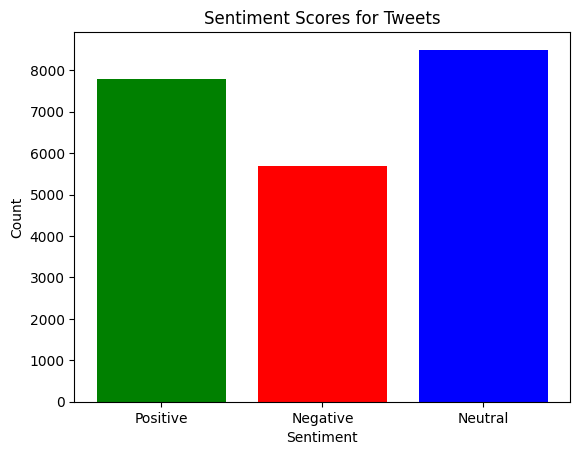

In [ ]:
# Create a bar chart of the sentiment scores
labels = ['Positive', 'Negative', 'Neutral']
scores = [positive_sentiment_score, negative_sentiment_score, neutral_sentiment_score]
plt.bar(labels, scores, color=['green', 'red', 'blue'])
plt.title('Sentiment Scores for Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

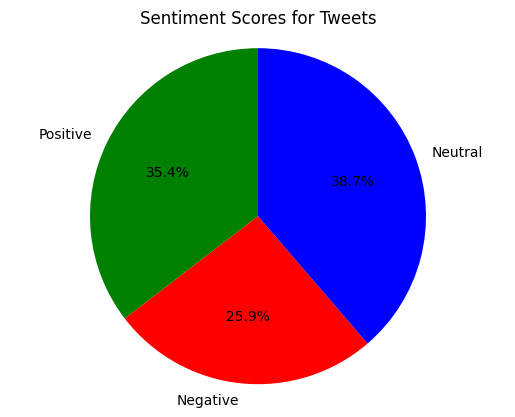

In [ ]:
labels = ['Positive', 'Negative', 'Neutral']
scores = [positive_sentiment_score, negative_sentiment_score, neutral_sentiment_score]

# Create the pie chart
fig, ax = plt.subplots()
ax.pie(scores, labels=labels, autopct='%1.1f%%', startangle=90, colors=['green', 'red', 'blue'])
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Sentiment Scores for Tweets')
plt.show()



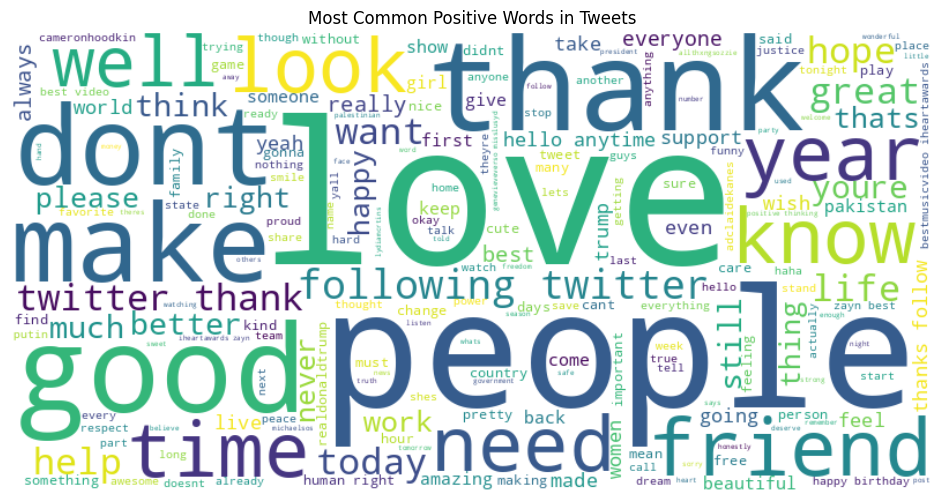

In [ ]:
# Create a word cloud of the most common positive words
from wordcloud import WordCloud

positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(positive_words_tweet))
plt.figure(figsize=(12, 6))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Positive Words in Tweets')
plt.show()

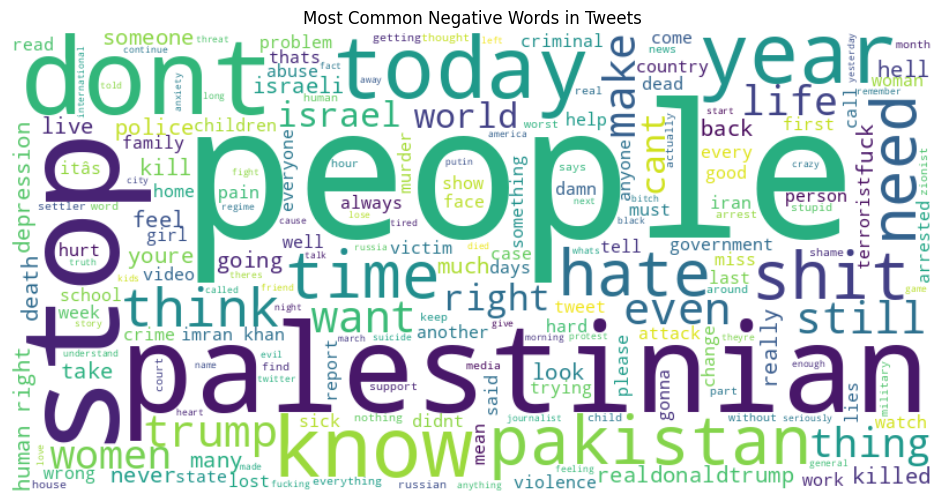

In [ ]:
# Create a word cloud of the most common negative words
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(negative_words_tweet))
plt.figure(figsize=(12, 6))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Negative Words in Tweets')
plt.show()

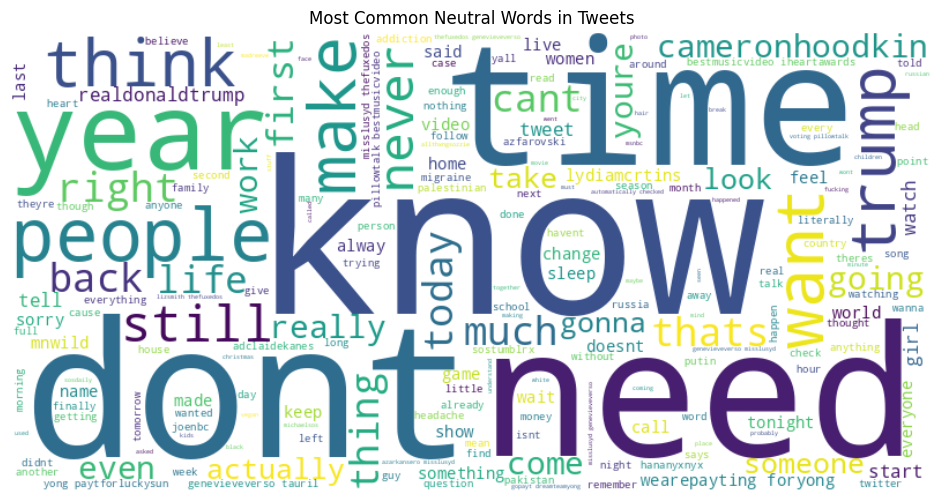

In [ ]:
# Create a word cloud of the most common neutral words
neutral_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(neutral_words_tweet))
plt.figure(figsize=(12, 6))
plt.imshow(neutral_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Neutral Words in Tweets')
plt.show()

# **5. K-means on Negative Tweets**

In [ ]:
# Create a new DataFrame with only the negative tweets and their negative scores
negative_df = df.loc[df['tweet_sentiment'] == 'negative', ['text', 'tweet_negative_score']]

# Rename the columns in the new DataFrame
negative_df.columns = ['Negative Tweet', 'Negative Score']

In [ ]:
negative_df.head()

,Negative Tweet,Negative Score
0,years since diagnosed anxiety depression today...,0.375
2,awake tired need sleep brain ideas,0.367
8,cant bothered cook take away lazy,0.295
14,urgh anxiety come breathe,0.362
27,even smallest thing still makes heart break do...,0.150


In [ ]:
# Extract the polarity scores and put them into a feature matrix
X = negative_df[['Negative Score']].values

In [ ]:
#apply Elbow and Silhouette score
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt

# Apply k-means clustering with a range of k values
k_values = range(2, 11)
inertias = []
silhouette_scores = []
davies_bouldin_scores = []
for k in k_values:
    kmeans = KMeans(n_clusters=k,verbose=True, max_iter=100, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))
    davies_bouldin_scores.append(davies_bouldin_score(X, kmeans.labels_))


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Initialization complete
Iteration 0, inertia 66.53343200000002.
Iteration 1, inertia 61.232858133978425.
Iteration 2, inertia 60.74992453591392.
Iteration 3, inertia 60.54667883923155.
Iteration 4, inertia 60.41662579159285.
Iteration 5, inertia 60.38302656829599.
Converged at iteration 5: center shift 1.9876901415166407e-06 within tolerance 3.137495818885193e-06.
Initialization complete
Iteration 0, inertia 82.238767.
Iteration 1, inertia 61.80263732165703.
Iteration 2, inertia 60.96876616051179.
Iteration 3, inertia 60.65954431489396.
Iteration 4, inertia 60.49872613719586.
Iteration 5, inertia 60.406220118089166.
Iteration 6, inertia 60.38302656829599.
Converged at iteration 6: center shift 1.9876901415166407e-06 within tolerance 3.137495818885193e-06.
Initialization complete
Iteration 0, inertia 82.53030799999988.
Iteration 1, inertia 67.60096899353258.
Iteration 2, inertia 63.25279052770672.
Iteration 3, inertia 61.482945990889874.
Iteration 4, inertia 60.85591005256851.
Iteration

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Initialization complete
Iteration 0, inertia 38.30535999999999.
Iteration 1, inertia 32.465434055967656.
Iteration 2, inertia 31.32662890407602.
Iteration 3, inertia 30.912525889526037.
Iteration 4, inertia 30.681821567787924.
Iteration 5, inertia 30.528382260040438.
Iteration 6, inertia 30.499716969565924.
Iteration 7, inertia 30.48562155612785.
Converged at iteration 7: center shift 1.5060226941193385e-06 within tolerance 3.137495818885193e-06.
Initialization complete
Iteration 0, inertia 39.36517300000004.
Iteration 1, inertia 33.519022895145625.
Iteration 2, inertia 32.20343062425421.
Iteration 3, inertia 31.405738667827755.
Iteration 4, inertia 31.01579337792692.
Iteration 5, inertia 30.74600638813216.
Iteration 6, inertia 30.5546922661731.
Iteration 7, inertia 30.50833440266741.
Iteration 8, inertia 30.491254306878968.
Converged at iteration 8: center shift 1.0200100611764509e-06 within tolerance 3.137495818885193e-06.
Initialization complete
Iteration 0, inertia 38.5956060000000

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Initialization complete
Iteration 0, inertia 19.551607999999984.
Iteration 1, inertia 18.948709729879866.
Iteration 2, inertia 18.720998167581183.
Iteration 3, inertia 18.596052897912664.
Iteration 4, inertia 18.475600120932487.
Iteration 5, inertia 18.414788482760898.
Iteration 6, inertia 18.40011632188517.
Iteration 7, inertia 18.3859288843178.
Converged at iteration 7: center shift 1.539704331198805e-06 within tolerance 3.137495818885193e-06.
Initialization complete
Iteration 0, inertia 19.573283000000004.
Iteration 1, inertia 18.92249784101029.
Iteration 2, inertia 18.84875902438544.
Iteration 3, inertia 18.813390758907538.
Iteration 4, inertia 18.761473939114673.
Iteration 5, inertia 18.728867402537258.
Iteration 6, inertia 18.644575632328984.
Iteration 7, inertia 18.58168223516325.
Iteration 8, inertia 18.541825743970687.
Iteration 9, inertia 18.516404605966535.
Iteration 10, inertia 18.45733335545655.
Iteration 11, inertia 18.426457475303458.
Iteration 12, inertia 18.39162029665

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Initialization complete
Iteration 0, inertia 15.098557999999958.
Iteration 1, inertia 13.576347005547905.
Iteration 2, inertia 13.226341152961133.
Iteration 3, inertia 13.018572032051539.
Iteration 4, inertia 12.865794304950608.
Iteration 5, inertia 12.769554185856638.
Iteration 6, inertia 12.731381645779331.
Iteration 7, inertia 12.704779366639203.
Iteration 8, inertia 12.654708748568844.
Iteration 9, inertia 12.623463458669598.
Iteration 10, inertia 12.605128775216773.
Iteration 11, inertia 12.593923922937257.
Iteration 12, inertia 12.566044104710652.
Iteration 13, inertia 12.55118985105904.
Converged at iteration 13: center shift 2.6593211347424594e-06 within tolerance 3.137495818885193e-06.
Initialization complete
Iteration 0, inertia 14.238516999999927.
Iteration 1, inertia 13.47866102048378.
Iteration 2, inertia 13.089753377961493.
Iteration 3, inertia 12.88590842981688.
Iteration 4, inertia 12.703350225220905.
Iteration 5, inertia 12.60040581649808.
Iteration 6, inertia 12.51331

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Initialization complete
Iteration 0, inertia 11.831801999999971.
Iteration 1, inertia 10.081718082424239.
Iteration 2, inertia 9.955614761680302.
Iteration 3, inertia 9.87406450765646.
Iteration 4, inertia 9.806505578635534.
Iteration 5, inertia 9.765167836521012.
Iteration 6, inertia 9.625626804239538.
Iteration 7, inertia 9.537551890135195.
Iteration 8, inertia 9.472338231351653.
Iteration 9, inertia 9.393621130716426.
Iteration 10, inertia 9.364307448598844.
Iteration 11, inertia 9.345025416408308.
Iteration 12, inertia 9.307668996276037.
Iteration 13, inertia 9.28996283057693.
Iteration 14, inertia 9.28073114491527.
Iteration 15, inertia 9.26250974972542.
Iteration 16, inertia 9.24589403401117.
Iteration 17, inertia 9.22192073402034.
Converged at iteration 17: center shift 2.1935485017236934e-06 within tolerance 3.137495818885193e-06.
Initialization complete
Iteration 0, inertia 10.920300999999993.
Iteration 1, inertia 9.778077624002314.
Iteration 2, inertia 9.539705610906022.
Iter

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Initialization complete
Iteration 0, inertia 8.655870000000004.
Iteration 1, inertia 6.712853346276062.
Iteration 2, inertia 6.576913930249939.
Iteration 3, inertia 6.544696726809187.
Iteration 4, inertia 6.5237401119793725.
Iteration 5, inertia 6.5141230872758555.
Iteration 6, inertia 6.503973635000785.
Converged at iteration 6: center shift 2.065167526831797e-06 within tolerance 3.137495818885193e-06.
Initialization complete
Iteration 0, inertia 9.00530300000002.
Iteration 1, inertia 7.833088486890652.
Iteration 2, inertia 7.44760544904312.
Iteration 3, inertia 7.154819824041319.
Iteration 4, inertia 6.89925113234248.
Iteration 5, inertia 6.4953072502469915.
Iteration 6, inertia 6.405090276074063.
Iteration 7, inertia 6.39649223428605.
Iteration 8, inertia 6.394043506009012.
Iteration 9, inertia 6.39295048298094.
Iteration 10, inertia 6.390639522229638.
Converged at iteration 10: center shift 4.819967956775713e-08 within tolerance 3.137495818885193e-06.
Initialization complete
Iterat

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Initialization complete
Iteration 0, inertia 6.024082999999986.
Iteration 1, inertia 4.7985533616988105.
Iteration 2, inertia 4.747202472360103.
Iteration 3, inertia 4.734372238468066.
Iteration 4, inertia 4.729043576672119.
Converged at iteration 4: center shift 1.0808082808080714e-06 within tolerance 3.137495818885193e-06.
Initialization complete
Iteration 0, inertia 6.151557999999989.
Iteration 1, inertia 5.32028683602145.
Iteration 2, inertia 5.119746940854431.
Iteration 3, inertia 5.057990173193021.
Iteration 4, inertia 5.003940634329981.
Iteration 5, inertia 4.958393846412793.
Iteration 6, inertia 4.914858079830866.
Iteration 7, inertia 4.888466719553515.
Iteration 8, inertia 4.867595828030055.
Iteration 9, inertia 4.848198144523488.
Iteration 10, inertia 4.835758289706827.
Iteration 11, inertia 4.803481297468667.
Iteration 12, inertia 4.77691283683456.
Iteration 13, inertia 4.760211882299885.
Iteration 14, inertia 4.749165774975422.
Iteration 15, inertia 4.735792407641066.
Itera

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Initialization complete
Iteration 0, inertia 4.2900509999999645.
Iteration 1, inertia 3.9072885242768742.
Iteration 2, inertia 3.875275549025757.
Iteration 3, inertia 3.832044563005473.
Iteration 4, inertia 3.813201226617396.
Iteration 5, inertia 3.7869278941619355.
Iteration 6, inertia 3.7796876617245143.
Iteration 7, inertia 3.7686798652407854.
Iteration 8, inertia 3.7657979855320347.
Converged at iteration 8: center shift 2.778293009657063e-06 within tolerance 3.137495818885193e-06.
Initialization complete
Iteration 0, inertia 5.036706999999968.
Iteration 1, inertia 4.2090374990470885.
Iteration 2, inertia 3.8192301721833424.
Iteration 3, inertia 3.7906339906675006.
Iteration 4, inertia 3.7699826031877253.
Iteration 5, inertia 3.767274783654682.
Converged at iteration 5: center shift 1.47372948154837e-06 within tolerance 3.137495818885193e-06.
Initialization complete
Iteration 0, inertia 4.9324589999999695.
Iteration 1, inertia 3.918632956075651.
Iteration 2, inertia 3.8372072667271

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Initialization complete
Iteration 0, inertia 3.84694699999996.
Iteration 1, inertia 3.15570789069689.
Iteration 2, inertia 3.0792124592901384.
Iteration 3, inertia 3.0495775752277337.
Iteration 4, inertia 3.0343082260117247.
Iteration 5, inertia 3.0302822005114947.
Iteration 6, inertia 3.026167139405286.
Converged at iteration 6: center shift 1.2484349393066645e-06 within tolerance 3.137495818885193e-06.
Initialization complete
Iteration 0, inertia 3.6603819999999563.
Iteration 1, inertia 3.1679824474728475.
Iteration 2, inertia 3.0983709694061687.
Iteration 3, inertia 3.072287495312611.
Iteration 4, inertia 3.051009390384147.
Iteration 5, inertia 3.0326809966654222.
Iteration 6, inertia 3.0203998180629195.
Iteration 7, inertia 3.008125316655806.
Iteration 8, inertia 2.9985744662332072.
Iteration 9, inertia 2.990145771590699.
Converged at iteration 9: center shift 2.5842904011647994e-06 within tolerance 3.137495818885193e-06.
Initialization complete
Iteration 0, inertia 3.4485249999999

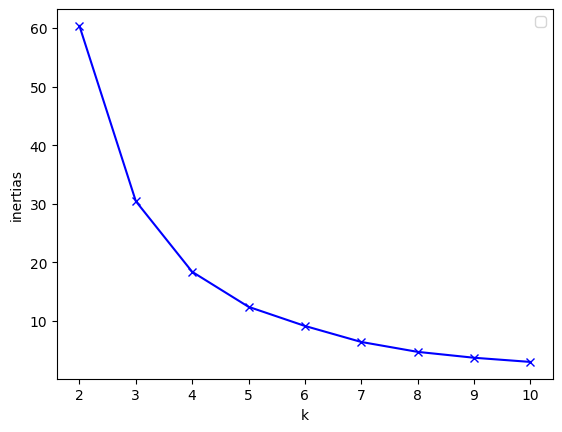

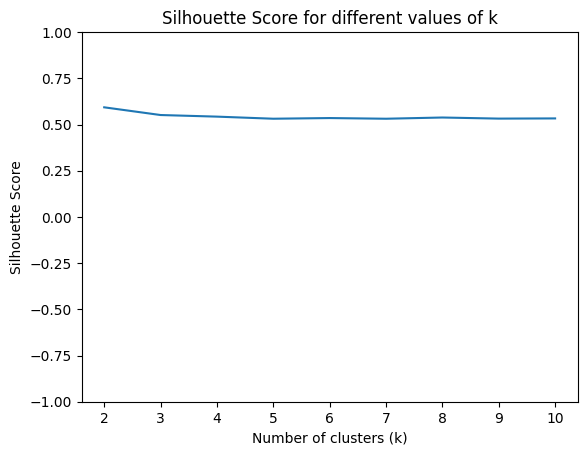

In [ ]:
# Find the optimal k using the elbow method and silhouette score
optimal_k = np.argmin(np.diff(inertias)) + 2
#print(f"Optimal k using elbow method: {optimal_k}")

optimal_k_silhouette = np.argmax(silhouette_scores) + 3
#print(f"Optimal k using silhouette score: {optimal_k_silhouette}")

optimal_k_davies_bouldin = np.argmin(davies_bouldin_scores) + 2
#print(f"Optimal k using Davies-Bouldin Index: {optimal_k_davies_bouldin}")

# Plot elbow graph
plt.plot(k_values, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('inertias')
#plt.axvline(x=optimal_k, linestyle='--', color='red', label='Optimal k')
plt.legend()
plt.show()

# Plotting the silhouette scores
plt.plot(k_values, silhouette_scores)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for different values of k')
plt.ylim(-1, 1)  # Set the y-axis limits to -1 and 1
plt.show()

In [ ]:
# Fit the k-means model with the optimal k value
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, max_iter=100, verbose=True)
kmeans.fit(X)

Initialization complete
Iteration 0, inertia 38.30535999999999.
Iteration 1, inertia 32.465434055967656.
Iteration 2, inertia 31.32662890407602.
Iteration 3, inertia 30.912525889526037.
Iteration 4, inertia 30.681821567787924.
Iteration 5, inertia 30.528382260040438.
Iteration 6, inertia 30.499716969565924.
Iteration 7, inertia 30.48562155612785.
Converged at iteration 7: center shift 1.5060226941193385e-06 within tolerance 3.137495818885193e-06.
Initialization complete
Iteration 0, inertia 39.36517300000004.
Iteration 1, inertia 33.519022895145625.
Iteration 2, inertia 32.20343062425421.
Iteration 3, inertia 31.405738667827755.
Iteration 4, inertia 31.01579337792692.
Iteration 5, inertia 30.74600638813216.
Iteration 6, inertia 30.5546922661731.
Iteration 7, inertia 30.50833440266741.
Iteration 8, inertia 30.491254306878968.
Converged at iteration 8: center shift 1.0200100611764509e-06 within tolerance 3.137495818885193e-06.
Initialization complete
Iteration 0, inertia 38.5956060000000

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=100, n_clusters=3, random_state=42, verbose=True)

In [ ]:
# Save the negative kmeans model to a .pkl file
filename = 'kmeans_negative_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(kmeans, file)

In [ ]:
# Check the convergence of the centroids
print(kmeans.cluster_centers_)

[[0.24918028]
 [0.69898593]
 [0.44120955]]


In [ ]:
# Assign each tweet to a cluster based on the predicted labels
labels = kmeans.predict(X)

# Add the labels to the dataframe
negative_df['Cluster'] = labels

# Print the number of tweets in each cluster
print(negative_df['Cluster'].value_counts())

0    2439
2    2250
1     992
Name: Cluster, dtype: int64


Cluster 0:


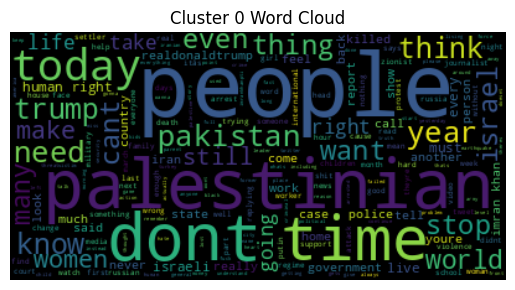

Cluster 1:


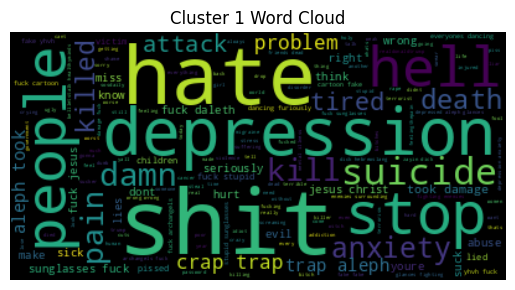

Cluster 2:


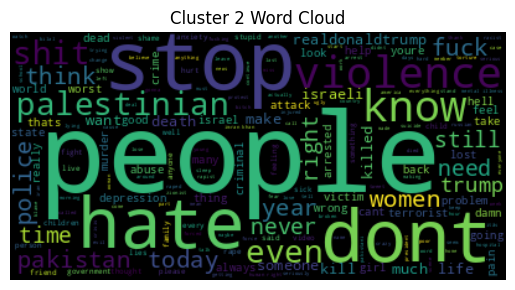

In [ ]:
for i in range(optimal_k):
    print(f"Cluster {i}:")
    cluster_indices = np.where(kmeans.labels_ == i)[0]
    cluster_text = negative_df.iloc[cluster_indices]['Negative Tweet']

    # Generate word cloud for the cluster
    cluster_wordcloud = WordCloud().generate(' '.join(cluster_text))

    # Plot the word cloud
    plt.figure()
    plt.imshow(cluster_wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Cluster {i} Word Cloud")
    plt.show()

In [ ]:
with open('kmeans_negative_labels.pkl', 'wb') as f:
    pickle.dump(labels, f)

In [ ]:
# Print the contents of the labels array
print(labels)

[2 2 0 ... 2 1 2]


In [ ]:
negative_df.head(10)

,Negative Tweet,Negative Score,Cluster
0,years since diagnosed anxiety depression today...,0.375,2
2,awake tired need sleep brain ideas,0.367,2
8,cant bothered cook take away lazy,0.295,0
14,urgh anxiety come breathe,0.362,2
27,even smallest thing still makes heart break do...,0.150,0
35,headache took three hours woke confused time,0.277,0
37,rspcaofficial ncolondon rspcaofficial please o...,0.415,2
38,bbccambs flying displays vintage jets signific...,0.360,2
40,dont sleep like catsoftwitter,0.413,2
49,offensivebanter awful,0.750,1


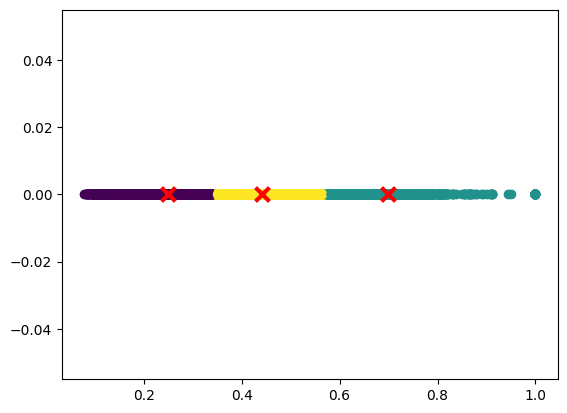

In [ ]:
# Plot the centroids and data points in a 2D space
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], [0]*len(X), c=labels)
plt.scatter(kmeans.cluster_centers_[:, 0], [0]*len(kmeans.cluster_centers_), marker='x', s=100, linewidths=3, color='r')
plt.show()

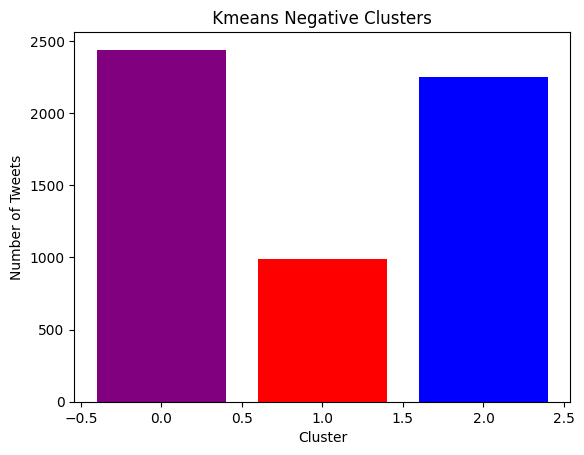

In [ ]:
# Count the number of tweets in each cluster
cluster_counts = negative_df['Cluster'].value_counts()

# Define colors for each cluster
colors = ['Purple', 'blue', 'red']
# Plot the bar chart
plt.bar(cluster_counts.index, cluster_counts.values, color=colors)
plt.xlabel('Cluster')
plt.ylabel('Number of Tweets')
plt.title(' Kmeans Negative Clusters ')

plt.show()

In [ ]:
optimal_k = 3
for i in range(optimal_k):
    print(f"Cluster {i}:")
    cluster_indices = np.where(kmeans.labels_ == i)[0]
    cluster_text = negative_df.iloc[cluster_indices]['Negative Tweet']
    cluster_scores = negative_df.iloc[cluster_indices]['Negative Score']
    print(f"Number of rows in Cluster {i}: {len(cluster_text)}")
    for index, (text, score) in zip(cluster_indices[:10], zip(cluster_text[:10], cluster_scores[:10])):
        print(f"{index}: {text} (Negative Score: {score})")
        print()
    print()

Cluster 0:
Number of rows in Cluster 0: 2439
2: cant bothered cook take away lazy (Negative Score: 0.295)

4: even smallest thing still makes heart break doesnt feel like ever goes away (Negative Score: 0.15)

5: headache took three hours woke confused time (Negative Score: 0.277)

13: brightonargus diversion route likely remain place shoreham crash (Negative Score: 0.278)

15: hope pilot pulls theres enough death today shoreham (Negative Score: 0.305)

17: yorkshireguy sarahbooker cant shake image unsuspecting people driving along minding business tragically (Negative Score: 0.243)

19: bbcbreaking people confirmed dead plane crashed several vehicles shoreham airshow (Negative Score: 0.323)

22: finding hard find funky decent quality toaster reasonable price silver boring cheap looking firstworldproblems (Negative Score: 0.317)

68: increased funding youth mental health substance abuse prevention (Negative Score: 0.341)

71: ever suspected someone experiencing ptsd (Negative Score: 0.

In [ ]:

# Save the DataFrame to a CSV file
negative_df.to_csv('neg_tweets_with_labels.csv', index=False)

In [ ]:
# Display each cluster max, min
unique_labels = np.unique(kmeans.labels_)
cluster_ranges = []
for label in unique_labels:
    cluster_indices = np.where(kmeans.labels_ == label)[0]
    cluster_size = len(cluster_indices)
    cluster_min = np.min(negative_df.iloc[cluster_indices]['Negative Score'])
    cluster_max = np.max(negative_df.iloc[cluster_indices]['Negative Score'])
    cluster_ranges.append((label, cluster_size, cluster_min, cluster_max))
    print(f"Cluster {label}: size = {cluster_size}, range = {cluster_min} to {cluster_max}")


Cluster 0: size = 2439, range = 0.079 to 0.345
Cluster 1: size = 992, range = 0.571 to 1.0
Cluster 2: size = 2250, range = 0.346 to 0.57


# **6. K-means on Postive Tweets**

In [ ]:
# Create a new DataFrame with only the positive tweets and their positive scores
positive_df = df.loc[df['tweet_sentiment'] == 'positive', ['text', 'tweet_positive_score']]

# Rename the columns in the new DataFrame
positive_df.columns = ['Positive Tweet', 'Positive Score']

positive_df.head()

In [ ]:
# Extract the polarity scores and put them into a feature matrix
P = positive_df[['Positive Score']].values

In [ ]:
# Apply k-means clustering with a range of k values
k_values = range(2, 11)
inertias = []
silhouette_scores = []
davies_bouldin_scores = []
for k in k_values:
    kmeans = KMeans(n_clusters=k,verbose=True, max_iter=100, random_state=42)
    kmeans.fit(P)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(P, kmeans.labels_))
    davies_bouldin_scores.append(davies_bouldin_score(P, kmeans.labels_))


Initialization complete
Iteration 0, inertia 163.0787440000006.
Iteration 1, inertia 113.25864199033705.
Iteration 2, inertia 95.7204889104912.
Iteration 3, inertia 88.5015566607369.
Iteration 4, inertia 85.52702735416358.
Iteration 5, inertia 84.62736655989448.
Iteration 6, inertia 84.42611043010922.
Iteration 7, inertia 84.351701578675.
Iteration 8, inertia 84.12975896882291.
Iteration 9, inertia 83.97018179974029.
Iteration 10, inertia 83.94862227421973.
Converged at iteration 10: center shift 1.8033614948831545e-06 within tolerance 3.255242548098523e-06.
Initialization complete
Iteration 0, inertia 189.47326099999964.
Iteration 1, inertia 87.82496644746534.
Iteration 2, inertia 85.95087462599062.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 3, inertia 84.52100375352953.
Iteration 4, inertia 84.11735528885426.
Iteration 5, inertia 83.9603516367435.
Converged at iteration 5: center shift 2.940243062834023e-06 within tolerance 3.255242548098523e-06.
Initialization complete
Iteration 0, inertia 132.7042859999999.
Iteration 1, inertia 90.03670701357831.
Iteration 2, inertia 86.28889506735783.
Iteration 3, inertia 84.80836000248212.
Iteration 4, inertia 84.45567575136953.
Iteration 5, inertia 84.3850248426453.
Iteration 6, inertia 84.12975896882291.
Iteration 7, inertia 83.97018179974029.
Iteration 8, inertia 83.94862227421973.
Converged at iteration 8: center shift 1.8033614948831545e-06 within tolerance 3.255242548098523e-06.
Initialization complete
Iteration 0, inertia 97.7326119999995.
Iteration 1, inertia 88.59440533255272.
Iteration 2, inertia 86.26306328024958.
Iteration 3, inertia 84.55929829985647.
Iteration 4, inertia 84.11735528885426.
Iteration 5, inertia 83.9603516367435.
Converged at iteration 5: center 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Initialization complete
Iteration 0, inertia 63.39725400000016.
Iteration 1, inertia 42.469024176167466.
Iteration 2, inertia 41.70924089909738.
Iteration 3, inertia 41.33243165662793.
Iteration 4, inertia 41.197294060316295.
Iteration 5, inertia 41.05598412698158.
Iteration 6, inertia 41.04185852746051.
Converged at iteration 6: center shift 4.7536009354516767e-07 within tolerance 3.255242548098523e-06.
Initialization complete
Iteration 0, inertia 46.25501199999994.
Iteration 1, inertia 40.83879441824692.
Iteration 2, inertia 40.53328575909589.
Iteration 3, inertia 40.47731640503761.
Iteration 4, inertia 40.45721940933599.
Converged at iteration 4: center shift 9.77977612782167e-07 within tolerance 3.255242548098523e-06.
Initialization complete
Iteration 0, inertia 42.159158000000176.
Iteration 1, inertia 40.57780251645154.
Iteration 2, inertia 40.46548104132696.
Iteration 3, inertia 40.457180299330986.
Converged at iteration 3: center shift 2.9183516363876457e-08 within tolerance 3.2

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Initialization complete
Iteration 0, inertia 29.637255000000273.
Iteration 1, inertia 26.329941739327964.
Iteration 2, inertia 25.72159149454148.
Iteration 3, inertia 25.420309568095796.
Iteration 4, inertia 25.294113003194376.
Iteration 5, inertia 25.261488738794576.
Iteration 6, inertia 25.198017722726334.
Iteration 7, inertia 25.052045740798427.
Iteration 8, inertia 25.022381141445557.
Converged at iteration 8: center shift 2.7912150740764823e-06 within tolerance 3.255242548098523e-06.
Initialization complete
Iteration 0, inertia 29.295952000000256.
Iteration 1, inertia 25.44324224028814.
Iteration 2, inertia 25.03292303802541.
Iteration 3, inertia 24.898233313316545.
Iteration 4, inertia 24.83056853988446.
Iteration 5, inertia 24.81447557308946.
Converged at iteration 5: center shift 2.2288576912702547e-06 within tolerance 3.255242548098523e-06.
Initialization complete
Iteration 0, inertia 26.455123999999998.
Iteration 1, inertia 25.51544974929226.
Iteration 2, inertia 25.300107897

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Initialization complete
Iteration 0, inertia 18.682507000000104.
Iteration 1, inertia 17.443465605325137.
Iteration 2, inertia 17.02709328467011.
Iteration 3, inertia 16.923980554760256.
Iteration 4, inertia 16.871163527079712.
Iteration 5, inertia 16.857809150786018.
Converged at iteration 5: center shift 2.102134029910851e-06 within tolerance 3.255242548098523e-06.
Initialization complete
Iteration 0, inertia 17.400082999999945.
Iteration 1, inertia 17.217773923726238.
Iteration 2, inertia 17.186623916804308.
Iteration 3, inertia 17.168697218296664.
Converged at iteration 3: center shift 1.1066754535656288e-06 within tolerance 3.255242548098523e-06.
Initialization complete
Iteration 0, inertia 21.098636000000056.
Iteration 1, inertia 19.284716359220695.
Iteration 2, inertia 18.65976142824106.
Iteration 3, inertia 18.477555651569393.
Iteration 4, inertia 18.3990201084942.
Iteration 5, inertia 18.379510015508266.
Iteration 6, inertia 18.370637634332983.
Converged at iteration 6: center

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Initialization complete
Iteration 0, inertia 15.778026999999977.
Iteration 1, inertia 13.075578630043797.
Iteration 2, inertia 12.841389257389196.
Iteration 3, inertia 12.773327024920897.
Iteration 4, inertia 12.75155720656932.
Iteration 5, inertia 12.634552949714749.
Iteration 6, inertia 12.60772904892064.
Iteration 7, inertia 12.586685568718949.
Iteration 8, inertia 12.584703364124938.
Converged at iteration 8: center shift 5.90007877666148e-07 within tolerance 3.255242548098523e-06.
Initialization complete
Iteration 0, inertia 17.459937000000036.
Iteration 1, inertia 14.118794482494152.
Iteration 2, inertia 13.223525595594587.
Iteration 3, inertia 13.068451704589437.
Iteration 4, inertia 13.000246923918334.
Iteration 5, inertia 12.981675533569462.
Converged at iteration 5: center shift 1.770087130186273e-06 within tolerance 3.255242548098523e-06.
Initialization complete
Iteration 0, inertia 14.153317999999889.
Iteration 1, inertia 13.43619455428044.
Iteration 2, inertia 13.124482931

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Initialization complete
Iteration 0, inertia 12.418410999999956.
Iteration 1, inertia 11.299095420611529.
Iteration 2, inertia 11.125194288772786.
Iteration 3, inertia 11.02515468917912.
Iteration 4, inertia 10.938813407308267.
Iteration 5, inertia 10.870580073308371.
Iteration 6, inertia 10.812441181061224.
Iteration 7, inertia 10.764562995901333.
Iteration 8, inertia 10.65875402905386.
Iteration 9, inertia 10.585244638324445.
Iteration 10, inertia 10.465446084687779.
Iteration 11, inertia 10.37759916625756.
Iteration 12, inertia 10.328344324815696.
Iteration 13, inertia 10.313747505586623.
Iteration 14, inertia 10.310908626833921.
Iteration 15, inertia 10.308446320816742.
Converged at iteration 15: center shift 7.655133962724748e-08 within tolerance 3.255242548098523e-06.
Initialization complete
Iteration 0, inertia 11.399840999999999.
Iteration 1, inertia 10.557524887545576.
Iteration 2, inertia 10.3320030652139.
Iteration 3, inertia 10.137375440749587.
Iteration 4, inertia 9.979004

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Initialization complete
Iteration 0, inertia 8.365968000000022.
Iteration 1, inertia 7.225805614008878.
Iteration 2, inertia 7.119732370086803.
Iteration 3, inertia 7.08094344031697.
Iteration 4, inertia 7.074261382905455.
Converged at iteration 4: center shift 1.1092918833859353e-06 within tolerance 3.255242548098523e-06.
Initialization complete
Iteration 0, inertia 10.014300000000002.
Iteration 1, inertia 8.013630883393127.
Iteration 2, inertia 7.547503261090288.
Iteration 3, inertia 7.326814195559432.
Iteration 4, inertia 7.242298849151425.
Iteration 5, inertia 7.201763754316841.
Iteration 6, inertia 7.183230693288266.
Iteration 7, inertia 7.176370752458666.
Converged at iteration 7: center shift 2.5016648268091056e-06 within tolerance 3.255242548098523e-06.
Initialization complete
Iteration 0, inertia 8.27602000000001.
Iteration 1, inertia 7.505746101275513.
Iteration 2, inertia 7.2887781629798205.
Iteration 3, inertia 7.164057360006099.
Iteration 4, inertia 7.0783170320531505.
Ite

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Initialization complete
Iteration 0, inertia 7.795936000000028.
Iteration 1, inertia 6.233377994423943.
Iteration 2, inertia 6.0356206495128495.
Iteration 3, inertia 5.852550297995875.
Iteration 4, inertia 5.746994218114699.
Iteration 5, inertia 5.712433936206908.
Iteration 6, inertia 5.682073953789385.
Iteration 7, inertia 5.65694800902215.
Converged at iteration 7: center shift 3.1696046173935445e-06 within tolerance 3.255242548098523e-06.
Initialization complete
Iteration 0, inertia 7.145691000000002.
Iteration 1, inertia 6.057848640926015.
Iteration 2, inertia 5.853266889360394.
Iteration 3, inertia 5.775603928972183.
Iteration 4, inertia 5.6872463624059115.
Iteration 5, inertia 5.659576265945407.
Iteration 6, inertia 5.652838232662759.
Iteration 7, inertia 5.643451925679683.
Converged at iteration 7: center shift 1.4441687923694933e-06 within tolerance 3.255242548098523e-06.
Initialization complete
Iteration 0, inertia 7.446759999999951.
Iteration 1, inertia 5.926289367993845.
Ite

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Initialization complete
Iteration 0, inertia 5.292639999999967.
Iteration 1, inertia 4.896647367169175.
Iteration 2, inertia 4.823445280487865.
Iteration 3, inertia 4.646020831232995.
Iteration 4, inertia 4.52751967778403.
Iteration 5, inertia 4.450473471277691.
Iteration 6, inertia 4.406503612421609.
Iteration 7, inertia 4.361205000744537.
Iteration 8, inertia 4.31477954354413.
Iteration 9, inertia 4.28428875321897.
Iteration 10, inertia 4.2514447375195985.
Iteration 11, inertia 4.238063203695612.
Converged at iteration 11: center shift 1.8554634922369894e-06 within tolerance 3.255242548098523e-06.
Initialization complete
Iteration 0, inertia 6.8783749999999895.
Iteration 1, inertia 5.6362761482095785.
Iteration 2, inertia 5.5005873444151385.
Iteration 3, inertia 5.406419849602354.
Iteration 4, inertia 5.3034758805579685.
Iteration 5, inertia 5.146945692222964.
Iteration 6, inertia 5.106596743939106.
Iteration 7, inertia 4.999776986508793.
Iteration 8, inertia 4.96054215983958.
Iterat

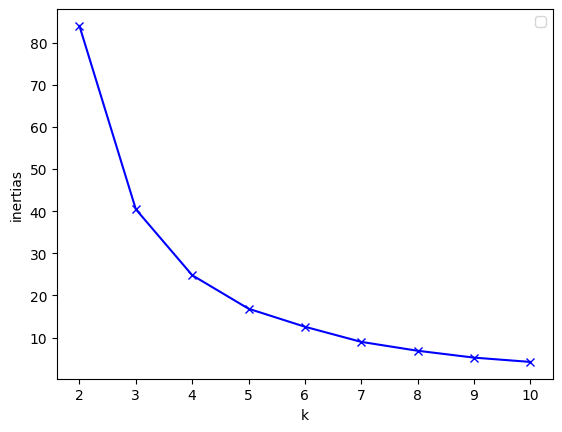

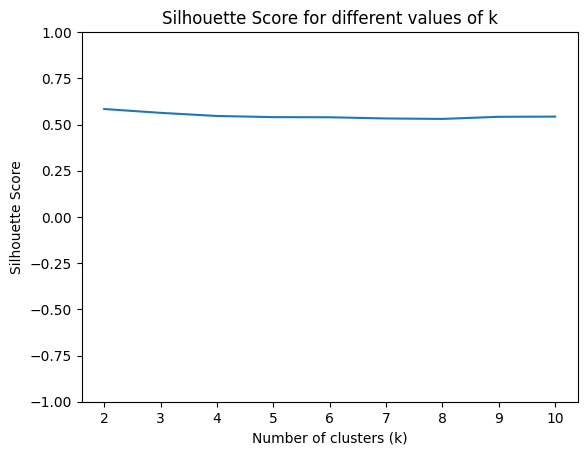

In [ ]:
# Find the optimal k using the elbow method and silhouette score
optimal_k = np.argmin(np.diff(inertias)) + 2
#print(f"Optimal k using elbow method: {optimal_k}")

optimal_k_silhouette = np.argmax(silhouette_scores) + 3
#print(f"Optimal k using silhouette score: {optimal_k_silhouette}")

optimal_k_davies_bouldin = np.argmin(davies_bouldin_scores) + 2
#print(f"Optimal k using Davies-Bouldin Index: {optimal_k_davies_bouldin}")

# Plot elbow graph
plt.plot(k_values, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('inertias')
#plt.axvline(x=optimal_k, linestyle='--', color='red', label='Optimal k')
plt.legend()
plt.show()

# Plotting the silhouette scores
plt.plot(k_values, silhouette_scores)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for different values of k')
plt.ylim(-1, 1)  # Set the y-axis limits to -1 and 1
plt.show()


In [ ]:
# Fit the k-means model with the optimal k value
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, max_iter=100, verbose=True)
kmeans.fit(P)

Initialization complete
Iteration 0, inertia 63.39725400000016.
Iteration 1, inertia 42.469024176167466.
Iteration 2, inertia 41.70924089909738.
Iteration 3, inertia 41.33243165662793.
Iteration 4, inertia 41.197294060316295.
Iteration 5, inertia 41.05598412698158.
Iteration 6, inertia 41.04185852746051.
Converged at iteration 6: center shift 4.7536009354516767e-07 within tolerance 3.255242548098523e-06.
Initialization complete
Iteration 0, inertia 46.25501199999994.
Iteration 1, inertia 40.83879441824692.
Iteration 2, inertia 40.53328575909589.
Iteration 3, inertia 40.47731640503761.
Iteration 4, inertia 40.45721940933599.
Converged at iteration 4: center shift 9.77977612782167e-07 within tolerance 3.255242548098523e-06.
Initialization complete
Iteration 0, inertia 42.159158000000176.
Iteration 1, inertia 40.57780251645154.
Iteration 2, inertia 40.46548104132696.
Iteration 3, inertia 40.457180299330986.
Converged at iteration 3: center shift 2.9183516363876457e-08 within tolerance 3.2

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=100, n_clusters=3, random_state=42, verbose=True)

In [ ]:
# Save the model to a .pkl file
filename = 'kmeans_positive_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(kmeans, file)

In [ ]:
# Check the convergence of the centroids
print(kmeans.cluster_centers_)

[[0.25192305]
 [0.69634988]
 [0.44810634]]


In [ ]:
# Assign each tweet to a cluster based on the predicted labels
labels = kmeans.predict(P)

# Add the labels to the dataframe
positive_df['Cluster'] = labels

# Print the number of tweets in each cluster
print(positive_df['Cluster'].value_counts())

2    3168
0    2941
1    1669
Name: Cluster, dtype: int64


Cluster 0:


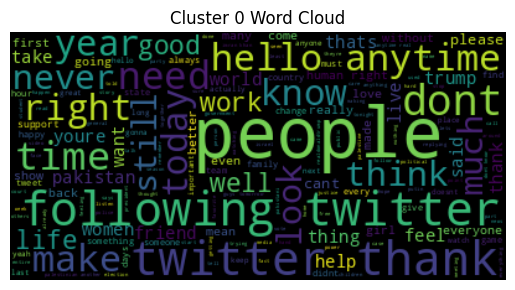

Cluster 1:


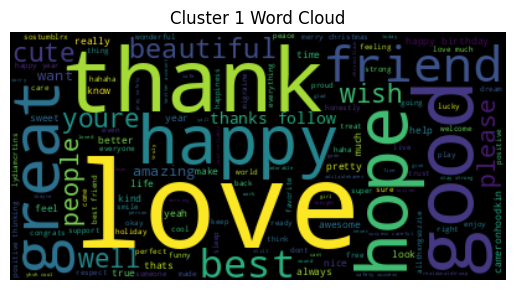

Cluster 2:


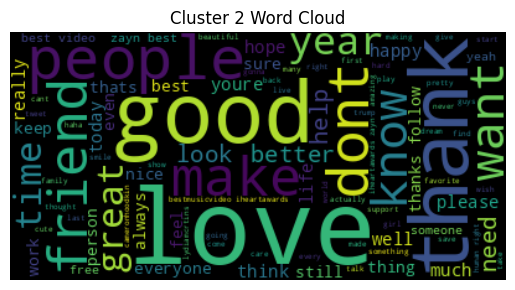

In [ ]:
for i in range(optimal_k):
    print(f"Cluster {i}:")
    cluster_indices = np.where(kmeans.labels_ == i)[0]
    cluster_text = positive_df.iloc[cluster_indices]['Positive Tweet']

    # Generate word cloud for the cluster
    cluster_wordcloud = WordCloud().generate(' '.join(cluster_text))

    # Plot the word cloud
    plt.figure()
    plt.imshow(cluster_wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Cluster {i} Word Cloud")
    plt.show()


In [ ]:
with open('kmeans_positive_labels.pkl', 'wb') as f:
    pickle.dump(labels, f)

In [ ]:
# Print the contents of the labels array
print(labels)

[2 0 2 ... 0 0 1]


In [ ]:
positive_df.head(10)

,Positive Tweet,Positive Score,Cluster
3,sewhq retro bears make perfect gifts great beg...,0.464,2
4,hard whether packing lists making life easier ...,0.176,0
13,back house moving stuff peaceful,0.444,2
17,packing purging feels good,0.492,2
21,theres nothing like cocktails exhaustion good ...,0.413,2
22,great night favourite ladies much needed past ...,0.509,2
25,always love peter gabriel eyes,0.512,2
26,busy ahead need focus feeling edge derailment ...,0.176,0
32,lovely pandastory,0.792,1
33,sewhq weather outside frightfulbut makes delig...,0.257,0


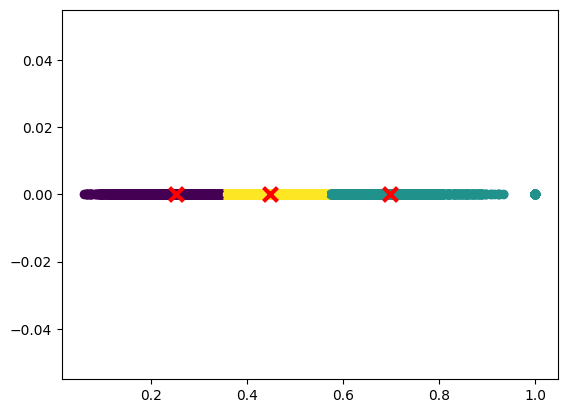

In [ ]:
# Plot the centroids and data points in a 2D space
import matplotlib.pyplot as plt
plt.scatter(P[:, 0], [0]*len(P), c=labels)
plt.scatter(kmeans.cluster_centers_[:, 0], [0]*len(kmeans.cluster_centers_), marker='x', s=100, linewidths=3, color='r')
plt.show()

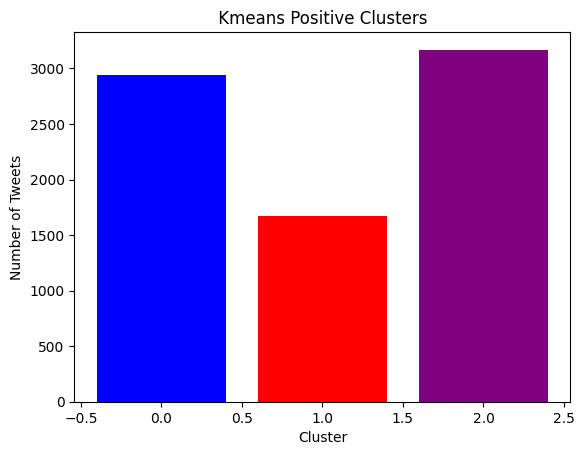

In [ ]:
# Count the number of tweets in each cluster
cluster_counts = positive_df['Cluster'].value_counts()

# Define colors for each cluster
colors = ['Purple', 'blue', 'red']
# Plot the bar chart
plt.bar(cluster_counts.index, cluster_counts.values, color=colors)
plt.xlabel('Cluster')
plt.ylabel('Number of Tweets')
plt.title(' Kmeans Positive Clusters ')

plt.show()

In [ ]:
optimal_k = 3
for i in range(optimal_k):
    print(f"Cluster {i}:")
    cluster_indices = np.where(kmeans.labels_ == i)[0]
    cluster_text = positive_df.iloc[cluster_indices]['Positive Tweet']
    cluster_scores = positive_df.iloc[cluster_indices]['Positive Score']
    print(f"Number of rows in Cluster {i}: {len(cluster_text)}")
    for index, (text, score) in zip(cluster_indices[:10], zip(cluster_text[:10], cluster_scores[:10])):
        print(f"{index}: {text} (Positive Score: {score})")
        print()
    print()

Cluster 0:
Number of rows in Cluster 0: 2941
1: hard whether packing lists making life easier reinforcing much still needs movinghouse anxiety (Positive Score: 0.176)

7: busy ahead need focus feeling edge derailment right (Positive Score: 0.176)

9: sewhq weather outside frightfulbut makes delightful heres sneak peak october issues projects (Positive Score: 0.257)

11: craftsbeautiful happy monday crafters need pickmeup started check (Positive Score: 0.346)

12: designtaxi cigarettes made green leaves claim help quit smoking (Positive Score: 0.252)

15: feels like shoreham coverage media gone beyond news ghoulish (Positive Score: 0.238)

28: limit video game time help manage adhd (Positive Score: 0.31)

51: help teen peer pressure parenting (Positive Score: 0.342)

56: concerned child playing football helmet helmet contact concussions (Positive Score: 0.205)

58: would like mental health taught school mentalhealth (Positive Score: 0.294)


Cluster 1:
Number of rows in Cluster 1: 1669


In [ ]:
# Display each cluster max, min
unique_labels = np.unique(kmeans.labels_)
cluster_ranges = []
for label in unique_labels:
    cluster_indices = np.where(kmeans.labels_ == label)[0]
    cluster_size = len(cluster_indices)
    cluster_min = np.min(positive_df.iloc[cluster_indices]['Positive Score'])
    cluster_max = np.max(positive_df.iloc[cluster_indices]['Positive Score'])
    cluster_ranges.append((label, cluster_size, cluster_min, cluster_max))
    print(f"Cluster {label}: size = {cluster_size}, range = {cluster_min} to {cluster_max}")

Cluster 0: size = 2941, range = 0.061 to 0.35
Cluster 1: size = 1669, range = 0.573 to 1.0
Cluster 2: size = 3168, range = 0.351 to 0.572
